*Import Libraries*

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science
## Milestone 5


**Harvard University**<br/>
**Fall 2023**<br/>
**Project Group 195**<br/>
**Project Members**: Daniel Sun-Friedman, Grayson Martin, Muqtader Omari<br/>
**Project Name**: Evaluation of Harvard Courses through the QGuide

<hr style="height:2pt">

In [ ]:
# line of code to install xgboost for anyone who does not have it yet
# ! pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.patches import Patch
from sklearn.impute import SimpleImputer
import time
import itertools

warnings.simplefilter(action='ignore', category=FutureWarning)

<a id="contents"></a>

## Table of Contents

- [**Project Statement**](#part1)


- [**Basic Info About the Data**](#part2)


- [**EDA**](#part3)


- [**Baseline Model**](#part4)


- [**Interpretation of Results**](#part5)


- [**Final Model Pipeline**](#part6)


- [**Conclusion and Future Work**](#part7)

<a id="part1"></a>

**Project Statement**

***Project Question:***
_Our project involves examining the Harvard Q Guide to obtain a better understanding of what factors of a course correlate with a high overall course rating. Our main questions are the following: How accurately can we predict the Mean Overall Score for a course based on its quantitative metrics and feedback components, and which components of the course (out of all 61 components we have included) are the most useful for predicting the Mean Overall Score (i.e. which predictor variables will our most best model use and which will it omit, where the “best model” is the one that generalizes best for new data)?_

***Project Significance:***
_This project examines what components of a course Harvard students do and do not associate with the course's overall likeability. In simpler terms, we can think of our project as a study of the question "What makes a course 'good'?" The Q Guide ratings are not a perfect method for determining how much students enjoyed a course, but hopefully they can still give us more insight on what makes up the foundation of a popular course._

***Project Relevance:***
_Determining what makes a course successful is a question highly relevant both for students, who want to find the best courses to take, and for professors, who want to design their courses in the best ways possible. For all factors that the Q Guide ratings cover, whether they be instructor quality or hours per week spent on a course, our project will provide two very relevant takeaways. The first takeaway is which of these factors make a difference at all in the course's rating; the second is which of these factors make the biggest difference in this rating. Both of these questions can be answered by looking at the correlations between predictor variables and the response variable. Our response variable is the Mean Overall Score per course, and if our project can provide a successful model for predicting this variable based on other Q Guide ratings, then we will have succeeded in giving students and professors a way to estimate the value of a course based on other factors._

**Basic Info About the Data**

*Create DataFrame*

In [ ]:
df = pd.read_csv('final.csv', encoding='latin-1')
pd.set_option('display.max_columns', None)

/tmp/ipykernel_18076/744013962.py:1: DtypeWarning: Columns (56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final.csv', encoding='latin-1')


*Remove columns left over from source and comments column since we aren't using sentiment analysis.*

In [ ]:
df = df.drop(['Unnamed: 0', 'web-scraper-order', 'web-scraper-start-url', 'course', 'comments'], axis=1)

*Take a peek at new dataframe*

In [ ]:
df.head()

,year,term,course_title,course_number1,department1,course_number2,department2,name_key1,instructor_first_name,instructor_last_name,enrollment,responses,number_of_comments,Course_Overall_Rating,Course_Materials_Rating,Course_Assignments_Rating,Course_Feedback_Rating,Course_Section_Rating,Course_Workload_Rating,Course_Goals_Rating,Course_Recommend_Rating,Course_Money_Rating,Instructor_Return_Rating,Instructor_Feedback_Rating,Instructor_Participation_Rating,Instructor_Enthusiasm_Rating,Instructor_Accessible_Rating,Instructor_Lectures_Rating,Instructor_Overall_Rating,Course_Overall_Respondents,Course_Materials_Respondents,Course_Assignments_Respondents,Course_Feedback_Respondents,Course_Section_Respondents,Course_Workload_Respondents,Course_Goals_Respondents,Course_Recommend_Respondents,Course_Money_Respondents,Instructor_Return_Respondents,Instructor_Feedback_Respondents,Instructor_Participation_Respondents,Instructor_Enthusiasm_Respondents,Instructor_Accessible_Respondents,Instructor_Lectures_Respondents,Instructor_Overall_Respondents,Course_Overall_Distribution,Course_Materials_Distribution,Course_Assignments_Distribution,Course_Feedback_Distribution,Course_Section_Distribution,Course_Workload_Distribution,Course_Goals_Distribution,Course_Recommend_Distribution,Course_Money_Distribution,Instructor_Return_Distribution,Instructor_Feedback_Distribution,Instructor_Participation_Distribution,Instructor_Enthusiasm_Distribution,Instructor_Accessible_Distribution,Instructor_Lectures_Distribution,Instructor_Overall_Distribution
0,2006,fall,Black Humor: Performance Art and Literature,112,AFRAMER,NaN,NaN,AFRAMER 112,"""","""",45,21,0,4.1,4.4,3.8,3.6,4.0,3.0,NaN,4.2,NaN,4.3,3.9,4.6,4.6,4.8,4.3,4.6,21.0,21.0,20.0,21.0,20.0,21.0,NaN,21.0,NaN,7.0,9.0,19.0,20.0,20.0,20.0,20.0,"[1, 3, 0, 6, 11]","[0, 1, 2, 5, 13]","[1, 3, 1, 9, 6]","[2, 4, 2, 5, 8]","[1, 1, 3, 8, 7]","[9, 11, 1, 0, 0]",NaN,"[3, 1, 0, 2, 15]",NaN,"[0, 1, 2, 2, 15]","[0, 1, 2, 7, 10]","[0, 0, 1, 3, 16]","[0, 0, 3, 1, 16]","[0, 0, 2, 3, 14]","[1, 0, 1, 4, 3]","[0, 0, 1, 3, 3]"
1,2006,fall,"Fictions of Race, Facts of Racism: Perspective...",113,AFRAMER,NaN,NaN,AFRAMER 113,NaN,NaN,0,[],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006,fall,Autobiography and Literary Imagination,116,AFRAMER,NaN,NaN,AFRAMER 116,"""","""",9,5,0,4.5,4.2,3.8,3.2,3.8,10.0,NaN,4.8,NaN,4.0,4.0,4.2,4.8,4.0,4.0,4.5,4.0,4.0,4.0,4.0,4.0,4.0,NaN,4.0,NaN,3.0,3.0,4.0,4.0,4.0,4.0,4.0,"[0, 0, 0, 2, 2]","[0, 0, 0, 3, 1]","[0, 1, 1, 0, 2]","[1, 1, 0, 0, 2]","[1, 0, 0, 1, 2]","[0, 0, 2, 2, 0]",NaN,"[0, 0, 0, 1, 3]",NaN,"[0, 0, 0, 2, 2]","[0, 1, 0, 1, 2]","[0, 0, 1, 2, 1]","[0, 0, 0, 1, 3]","[0, 1, 0, 0, 3]","[0, 1, 0, 0, 2]","[0, 1, 0, 0, 2]"
3,2006,fall,Introduction to African Music,175,AFRAMER,NaN,NaN,AFRAMER 175,"""","""",14,13,0,4.4,4.1,3.7,4.0,4.0,5.0,NaN,4.7,NaN,3.7,3.7,4.4,4.5,3.4,4.4,4.6,13.0,13.0,13.0,13.0,1.0,13.0,NaN,13.0,NaN,10.0,12.0,10.0,13.0,9.0,12.0,13.0,"[0, 1, 2, 1, 9]","[0, 1, 1, 7, 4]","[0, 1, 4, 6, 2]","[0, 1, 3, 4, 5]","[0, 0, 0, 1, 0]","[2, 7, 4, 0, 0]",NaN,"[0, 0, 0, 4, 9]",NaN,"[0, 0, 1, 3, 9]","[0, 0, 2, 3, 7]","[0, 1, 5, 1, 2]","[0, 0, 1, 4, 8]","[0, 1, 0, 3, 6]","[0, 2, 2, 6, 2]","[0, 1, 3, 4, 2]"
4,2006,fall,"African-American Families: Politics, Culture, ...",190,AFRAMER,NaN,NaN,AFRAMER 190,"""","""",13,8,0,4.4,4.4,4.1,4.1,0.0,3.0,NaN,4.4,NaN,4.5,4.3,4.6,4.3,4.2,4.1,4.4,7.0,7.0,7.0,7.0,0.0,7.0,NaN,7.0,NaN,6.0,6.0,7.0,7.0,6.0,7.0,7.0,"[0, 0, 1, 2, 4]","[0, 0, 0, 4, 3]","[0, 1, 0, 3, 3]","[0, 1, 0, 3, 3]",[],"[2, 5, 0, 0, 0]",NaN,"[0, 0, 1, 2, 4]",NaN,"[0, 0, 1, 2, 4]","[0, 0, 1, 4, 2]","[0, 1, 1, 0, 4]","[0, 0, 1, 3, 3]","[0, 0, 1, 1, 5]","[0, 0, 1, 2, 3]","[0, 0, 1, 1, 4]"


*Check dimensions of dataframe*

In [ ]:
print('Rows: {}, Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 28398, Columns: 61


*Basic info about columns*

In [ ]:
df.describe()

,year,enrollment,number_of_comments,Course_Overall_Rating,Course_Materials_Rating,Course_Assignments_Rating,Course_Feedback_Rating,Course_Section_Rating,Course_Workload_Rating,Course_Goals_Rating,Course_Recommend_Rating,Course_Money_Rating,Instructor_Return_Rating,Instructor_Feedback_Rating,Instructor_Participation_Rating,Instructor_Enthusiasm_Rating,Instructor_Accessible_Rating,Instructor_Lectures_Rating,Instructor_Overall_Rating,Course_Overall_Respondents,Course_Materials_Respondents,Course_Assignments_Respondents,Course_Feedback_Respondents,Course_Section_Respondents,Course_Workload_Respondents,Course_Goals_Respondents,Course_Recommend_Respondents,Course_Money_Respondents,Instructor_Return_Respondents,Instructor_Feedback_Respondents,Instructor_Participation_Respondents,Instructor_Enthusiasm_Respondents,Instructor_Accessible_Respondents,Instructor_Lectures_Respondents,Instructor_Overall_Respondents
count,28398.000000,28398.000000,28398.000000,25001.000000,25001.000000,25001.000000,25001.000000,25000.000000,24896.000000,1.0,25001.000000,2352.000000,18470.000000,19991.000000,19986.000000,18999.000000,19986.000000,19986.000000,19983.000000,25001.000000,25001.000000,25001.000000,25001.000000,25000.000000,25001.000000,1.0,25001.000000,2352.000000,18470.000000,19991.000000,19986.000000,18999.000000,19986.000000,19986.000000,19983.000000
mean,2012.242623,22.516832,11.861117,4.224623,4.174713,4.077077,4.080593,3.617536,5.977390,3.4,4.261678,1.507313,4.323855,4.011455,4.218198,4.408558,4.259492,4.222351,4.373467,20.088236,19.457502,19.605256,19.226951,15.043480,19.254230,235.0,19.966921,19.606293,8.151651,7.741033,12.606975,18.500395,15.952317,18.113329,18.737227
std,3.416496,48.031005,46.759676,0.579447,0.747835,0.753713,0.805342,1.677990,3.872746,NaN,0.575689,0.532338,0.699088,1.171155,0.931293,0.739888,0.802163,0.936172,0.563147,42.292388,41.785732,42.119643,41.470933,39.592775,41.185822,NaN,42.106556,44.452917,10.330565,9.544772,19.857274,36.224403,29.531957,36.251523,36.375440
min,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.4,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,235.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,6.000000,0.000000,3.900000,3.900000,3.800000,3.700000,3.400000,4.000000,3.4,4.000000,1.000000,4.000000,3.800000,4.000000,4.200000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,235.0,5.000000,5.000000,3.000000,3.000000,4.000000,5.000000,5.000000,4.000000,5.000000
50%,2012.000000,11.000000,0.000000,4.300000,4.300000,4.200000,4.200000,4.200000,5.400000,3.4,4.300000,1.400000,4.500000,4.300000,4.400000,4.600000,4.400000,4.500000,4.500000,9.000000,9.000000,9.000000,9.000000,3.000000,9.000000,235.0,9.000000,9.000000,6.000000,6.000000,7.000000,9.000000,8.000000,8.000000,9.000000
75%,2015.000000,19.000000,8.000000,4.700000,4.600000,4.500000,4.600000,4.800000,7.200000,3.4,4.700000,1.900000,4.900000,4.800000,4.800000,4.900000,4.800000,4.800000,4.800000,17.000000,16.000000,16.000000,16.000000,11.000000,16.000000,235.0,17.000000,16.000000,10.000000,10.000000,13.000000,16.000000,15.000000,16.000000,16.000000
max,2018.000000,921.000000,2246.000000,5.000000,5.000000,5.000000,5.000000,5.000000,96.000000,3.4,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,849.000000,848.000000,848.000000,848.000000,733.000000,851.000000,235.0,847.000000,779.000000,202.000000,191.000000,597.000000,707.000000,594.000000,712.000000,713.000000


*Examine numeric predictor correlations*

In [ ]:
df_numeric = df.select_dtypes(include=np.number)
X = df_numeric.drop('Course_Overall_Rating', axis=1)
X_cor = X.corr()
predictors = X_cor.columns

high_idxs = np.argwhere((X_cor > 0.99) | (X_cor < -0.99))
same_pred_mask = [idx[0] > idx[1] for idx in high_idxs]
high_idxs = high_idxs[same_pred_mask]

high_corr = {}
for row, col in high_idxs:
    row, col = predictors[row], predictors[col]
    high_corr[(row, col)] = X_cor[row][col]

**EDA**

*Examine course component correlations*

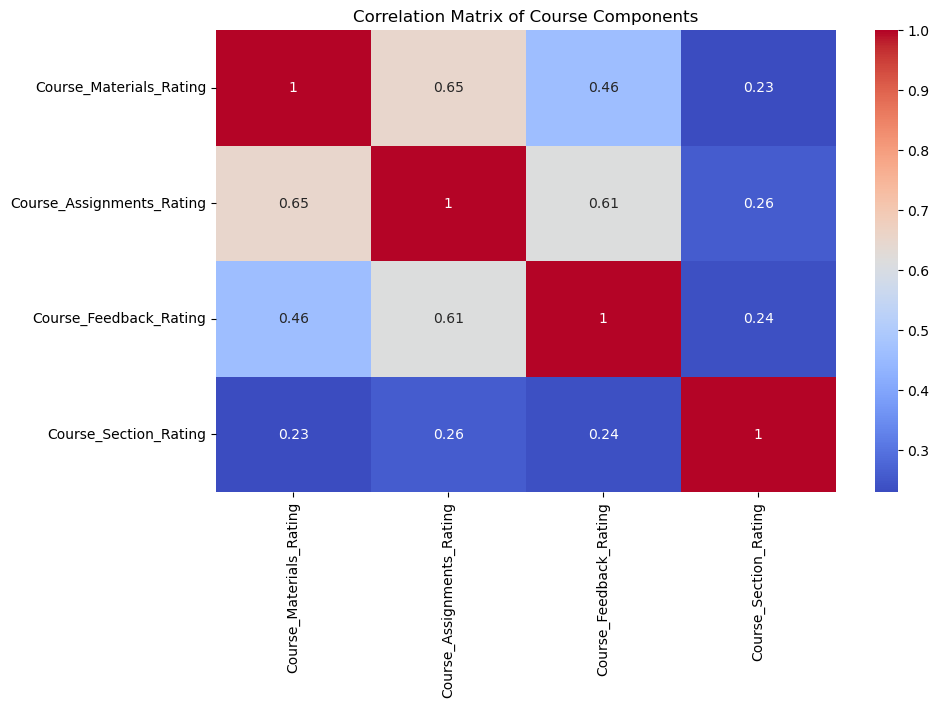

In [ ]:
relevant_columns = [
    'Course_Materials_Rating',
    'Course_Assignments_Rating',
    'Course_Feedback_Rating',
    'Course_Section_Rating'
]
corr_data = df[relevant_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Course Components')
plt.show()

***Analysis:***
_None of these pairs of course component predictors have correlation coefficients with an absolute value greater than 0.99 (aside from, of course, each component’s correlation with itself). Thus, we do not need to worry about any of these predictors being highly collinear with one another, but we should still proceed with caution since nonzero correlation coefficients imply that their could still be some collinearity._

_Aside from this correlation matrix which focuses only on course components, directly above this plot we also calculated which pairs of variables have correlation coefficients with absolute value greater than 0.99. There are many pairs, implying that several of our predictor variables are collinear and may not be useful for our final models._


*Examine distribution of course component ratings*

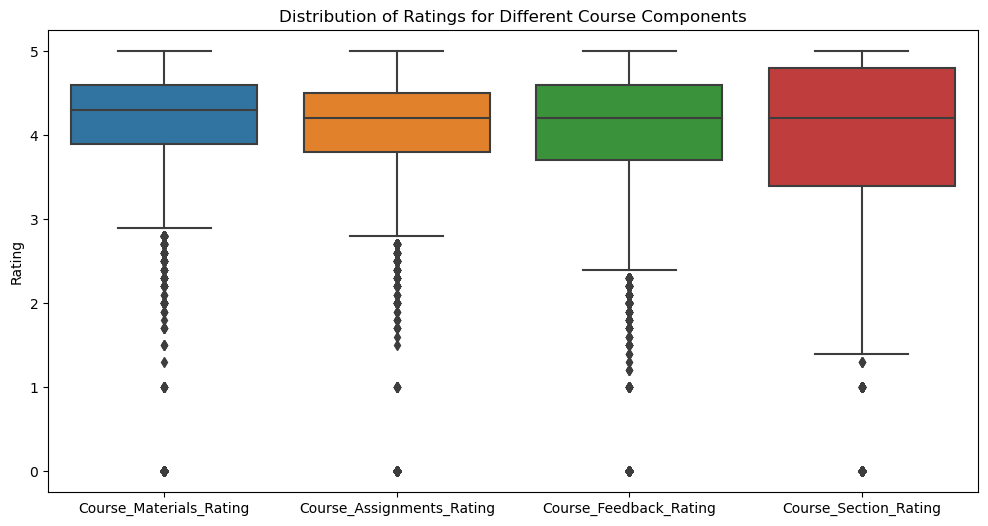

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[[
    'Course_Materials_Rating',
    'Course_Assignments_Rating',
    'Course_Feedback_Rating',
    'Course_Section_Rating'
]])
plt.title('Distribution of Ratings for Different Course Components')
plt.ylabel('Rating')
plt.show()

***Analysis:***
_As we see, all four of these components have the majority of their ratings very high, in the range of values between 4 and 5. Further down in this milestone, we examine the distribution of the response variable’s ratings, and find that it has a similar distribution. This may imply that these course components are good predictors for our response variable._

_However, we should also consider whether the fact that many of the observations are within a relatively small range of values will pose a problem for us or not. Since the response variable’s range is in a similar window, there may not be a problem, but we will stay alert in case there is._

*Examine workload ratings distribution*

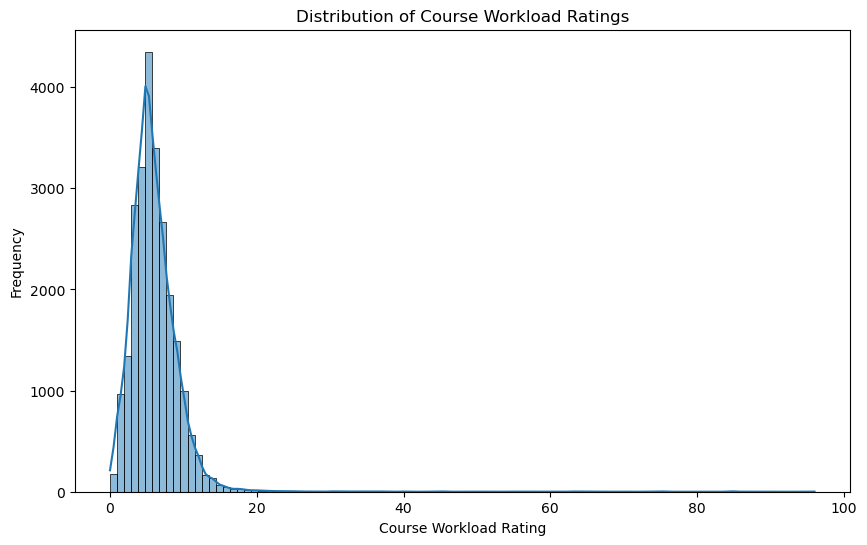

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Course_Workload_Rating'].dropna(), kde=True, bins=100)
plt.title('Distribution of Course Workload Ratings')
plt.xlabel('Course Workload Rating')
plt.ylabel('Frequency')
plt.show()

***Analysis:***
_There seems to be a fairly “normal” (i.e. bell-shaped) distribution for these ratings, implying that the variable has enough variance that it may be useful for our model._

*Plot relationships between numeric predictors and target*

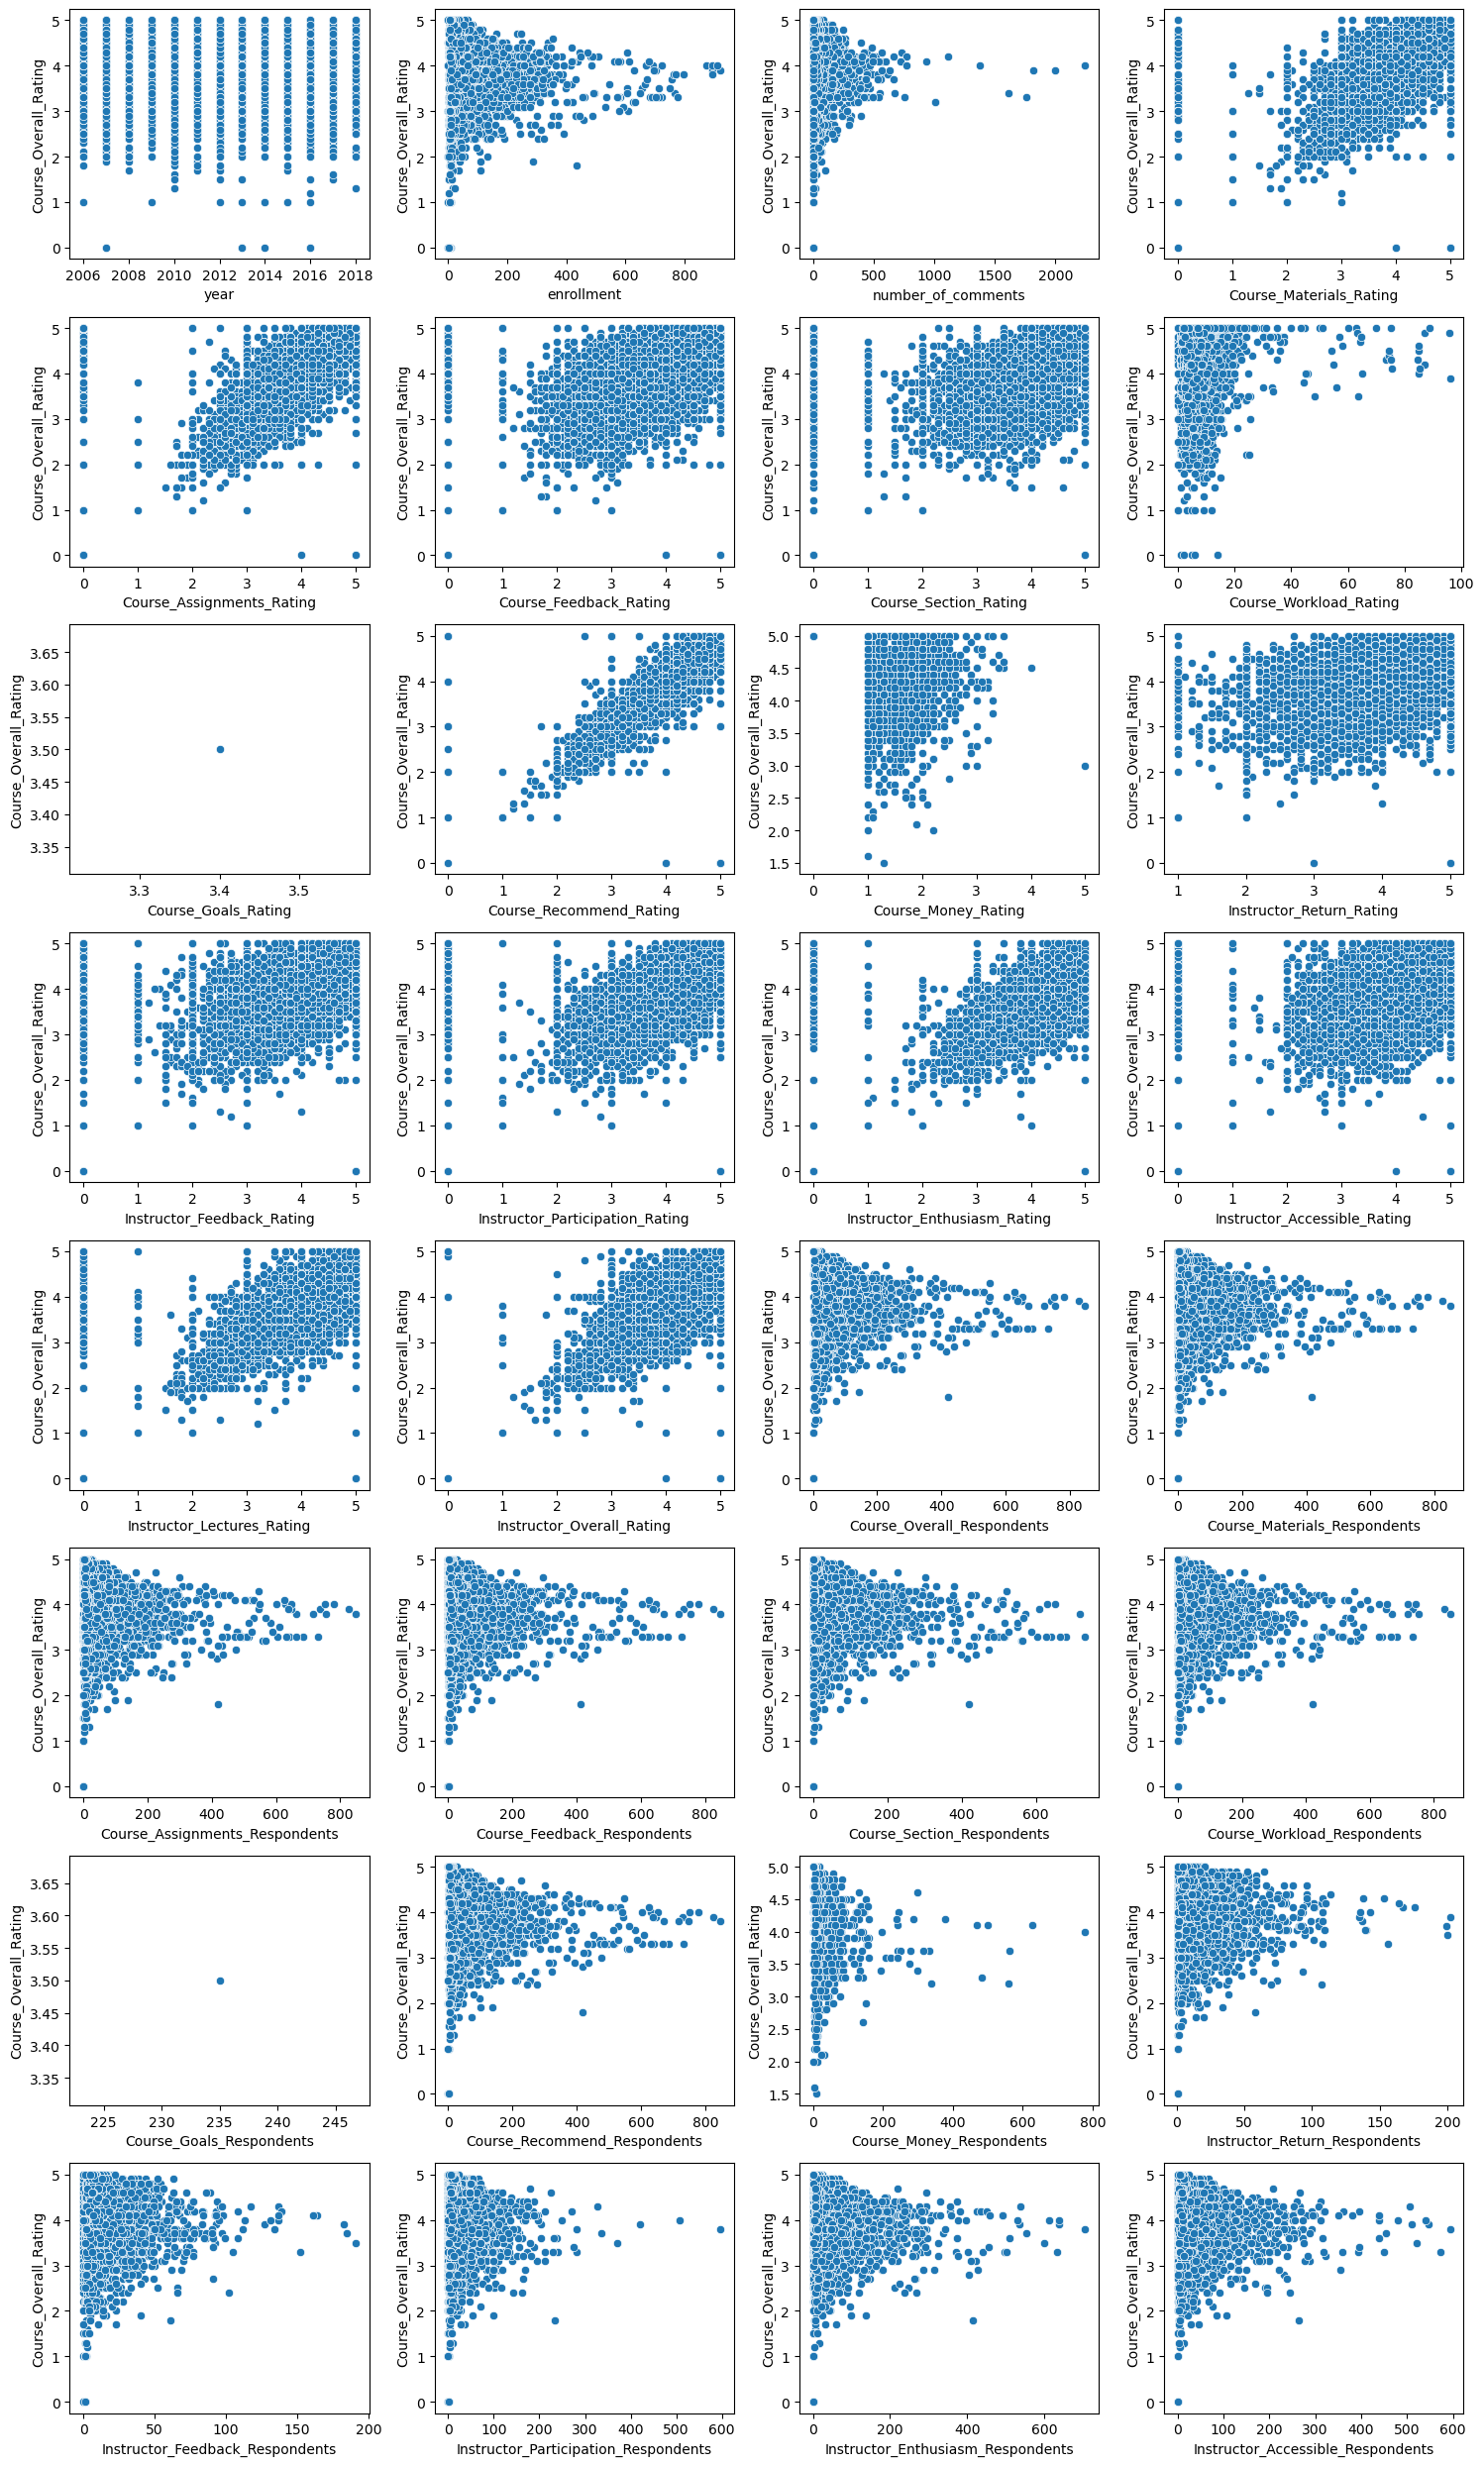

In [ ]:
#sns.pairplot(data=df_numeric, x_vars=df_numeric.columns.tolist().remove('Course_Overall_Rating'), y_vars=['Course_Overall_Rating'])
df_numeric_ps = df_numeric.drop('Course_Overall_Rating', axis=1)
num_ps = df_numeric_ps.shape[1]
fig, axs = plt.subplots(num_ps//4, 4, figsize=(15, 25))
axs = axs.ravel()
for ax, x_var in zip(axs, df_numeric_ps.columns):
    sns.scatterplot(data=df_numeric, x=x_var, y='Course_Overall_Rating', ax=ax)
plt.tight_layout()


***Analysis:***
_This set of plots helps us quickly get a sense of which variables are correlated with our response variable. Many of these variables, such as Course_Materials_Rating and Instructor_Overall_Rating, seem to have positive correlations with our response variable._

_The plots also help us spot predictors that are less relevant. We clearly see that Course_Goals_Rating and Course_Goals_Respondents are irrelevant since they each contain a single data point, so we will not include either of these in our final model._

_Finally, the plots can help us observe which predictor variables may be collinear. For instance, almost all the variables ending in “Respondents” have very similarly shaped distributions, so all these predictors variables are likely collinear. Thus, our final models will probably only use one of these variables rather than all of them, to avoid redundancy._


*Examine how many reviews given each year*

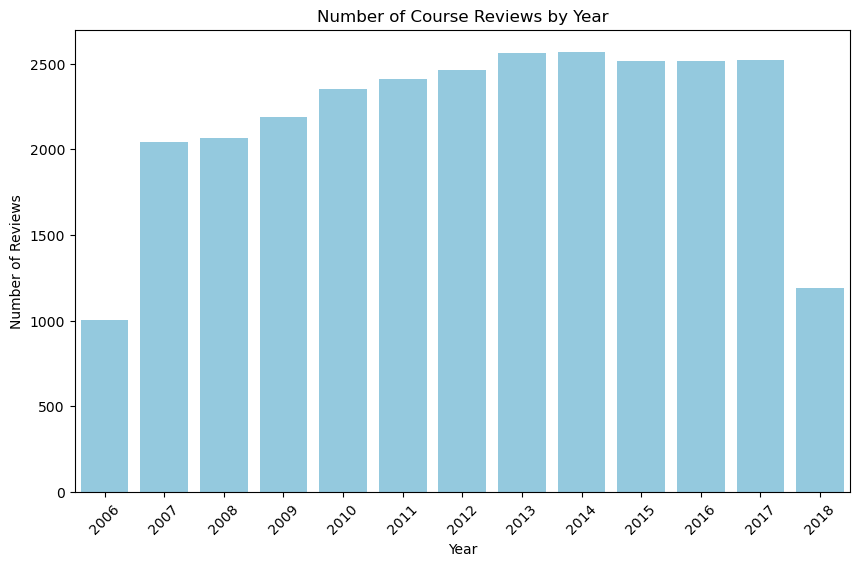

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df, color='skyblue')
plt.title('Number of Course Reviews by Year')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

# Show the first plot
plt.show()

***Analysis:***
_It makes sense for us to examine the number of course reviews per year, because, as we explain later on, the year itself may serve as an effective predictor variable for estimating the value of our response variable. Besides 2006 and 2018, most of the years have around the same number of responses. This is the result we were hoping to find, since a larger gap between the number of reviews per year could have led to a data set with increased bias._

*Examine course rating trend over time*

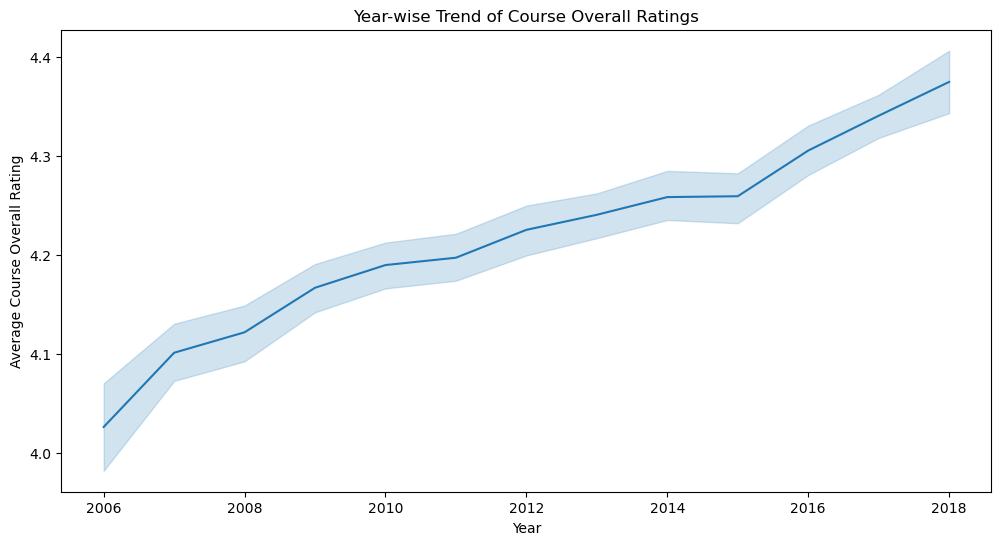

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Course_Overall_Rating', data=df, estimator='mean')
plt.title('Year-wise Trend of Course Overall Ratings')
plt.xlabel('Year')
plt.ylabel('Average Course Overall Rating')
plt.show()

***Analysis:***
_This graph shows that the variable “year” may be a relevant predictor variable for the Overall Course Rating, since the graph suggests a positive correlation between the two variables. Thus, we will most likely want to include the “year” variable in our models, and it seems that there is a trend on average of courses getting higher overall ratings as the years go by._

**Examine target column (Course_Overall_Rating)**

In [ ]:
target = df['Course_Overall_Rating']

*Check Missing Data*

In [ ]:
print('Number of missing data points: {}'.format(target.isna().sum()))

Number of missing data points: 3397


[Text(0.5, 1.0, 'Course Rating Counts')]

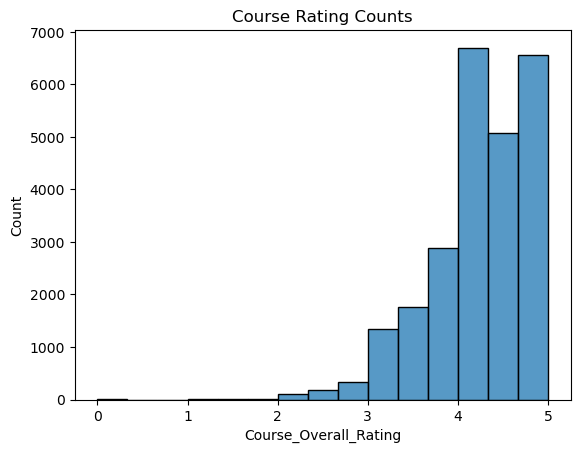

In [ ]:
sns.histplot(target, bins=15).set(title="Course Rating Counts")

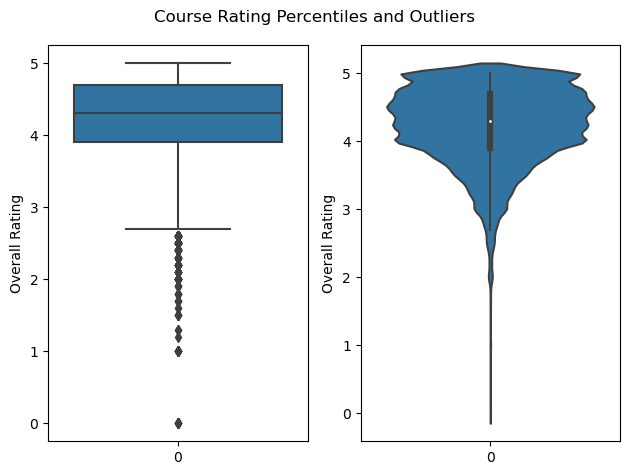

In [ ]:
fig, axs = plt.subplots(1, 2)
sns.boxplot(target, ax=axs[0]).set(ylabel='Overall Rating')
sns.violinplot(target, ax=axs[1]).set(ylabel='Overall Rating')
plt.suptitle('Course Rating Percentiles and Outliers')
plt.tight_layout()

***Analysis:***
_We see here that the distribution for our course overall rating has a distribution with a similar range to those of the course component ratings in our predictor variables. However, these plots still contain several outliers from this main range._

_Thus, we must attempt to create a model that will generalize to predict outliers as well. This may be difficult, since the courses with low mean overall ratings are much fewer in number than the courses with high mean overall ratings, so we may not have enough data to generalize to these outliers._

**Investigate data missingness**

In [ ]:
missing_counts = []
for col in list(filter(lambda x: x != 'Course_Overall_Rating', df.columns.tolist())):
    missing_counts.append({'col': col, 'num_missing': df[col].isna().sum()})

missing_counts_df = pd.DataFrame.from_dict(missing_counts).sort_values(by='num_missing', ascending=False)
display(missing_counts_df)

,col,num_missing
34,Course_Goals_Respondents,28397
18,Course_Goals_Rating,28397
50,Course_Goals_Distribution,28397
5,course_number2,28131
6,department2,28131
52,Course_Money_Distribution,26047
20,Course_Money_Rating,26046
36,Course_Money_Respondents,26046
37,Instructor_Return_Respondents,9928
21,Instructor_Return_Rating,9928


In [ ]:
worst_missing_cols = missing_counts_df.query('num_missing >= 20000')['col'].values.tolist()
display(worst_missing_cols)

['Course_Goals_Respondents',
 'Course_Goals_Rating',
 'Course_Goals_Distribution',
 'course_number2',
 'department2',
 'Course_Money_Distribution',
 'Course_Money_Rating',
 'Course_Money_Respondents']

In [ ]:
missing_percentages = df.isnull().mean() * 100
print(missing_percentages)

year                                      0.000000
term                                      0.000000
course_title                              0.000000
course_number1                            0.000000
department1                               0.000000
                                           ...    
Instructor_Participation_Distribution    29.621804
Instructor_Enthusiasm_Distribution       33.097401
Instructor_Accessible_Distribution       29.621804
Instructor_Lectures_Distribution         29.621804
Instructor_Overall_Distribution          29.632368
Length: 61, dtype: float64


**Use imputation to combat data missingness**

*The yellow lines show the places where missingness occurs*

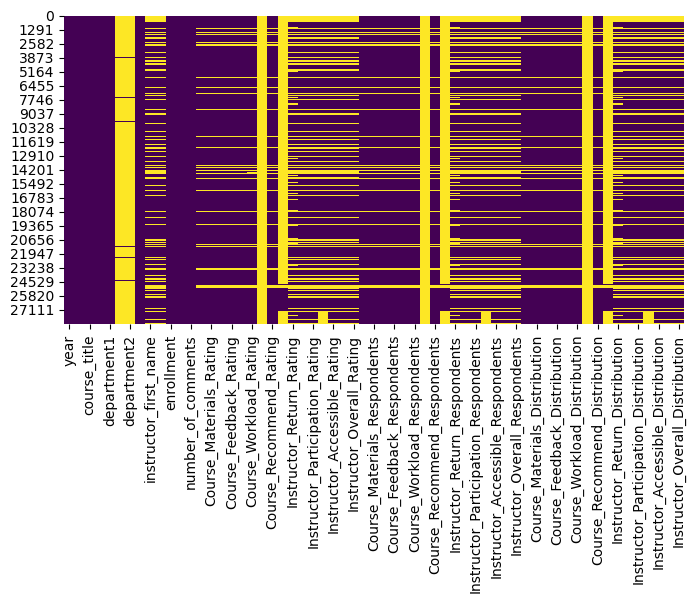

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()



*Impute missing categorical predictors with the most frequent from the column*

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
categorical_data = df.select_dtypes(include=['object'])
df[categorical_data.columns] = imputer.fit_transform(categorical_data)

*Here, after the imputation the yellow lines are removed*

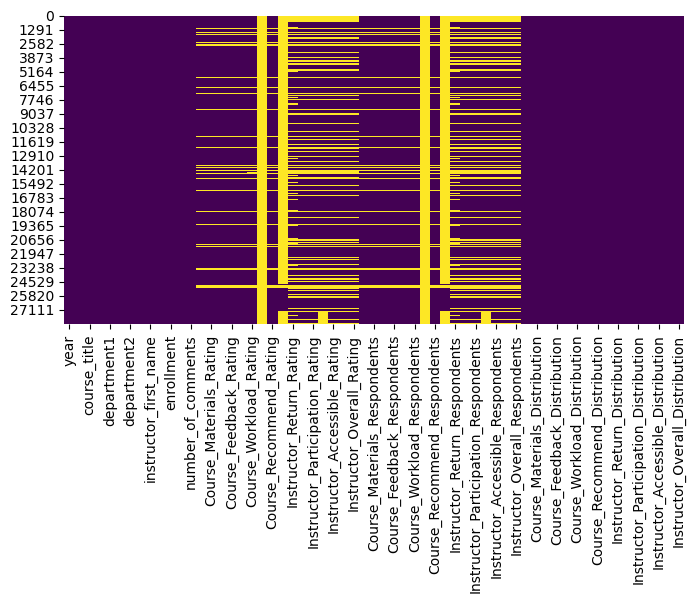

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()



**Basic Model: Simple Linear Regression**

*Get list of predictors that are already numeric along with response*\
*Note that given the extreme nature of some of the missingness, we choose to drop certain columns altogether*

In [ ]:
numeric_less_missing = list(filter(lambda x: x not in worst_missing_cols, df.select_dtypes(include=np.number).columns.tolist()))

*Use one hot encoding on some categorical variables so they can be used in linear regression*

In [ ]:
categorical_cols = ['department1', 'term']

df_linreg = df[numeric_less_missing + categorical_cols].dropna(ignore_index=True)
df_linreg.head()

,year,enrollment,number_of_comments,Course_Overall_Rating,Course_Materials_Rating,Course_Assignments_Rating,Course_Feedback_Rating,Course_Section_Rating,Course_Workload_Rating,Course_Recommend_Rating,Instructor_Return_Rating,Instructor_Feedback_Rating,Instructor_Participation_Rating,Instructor_Enthusiasm_Rating,Instructor_Accessible_Rating,Instructor_Lectures_Rating,Instructor_Overall_Rating,Course_Overall_Respondents,Course_Materials_Respondents,Course_Assignments_Respondents,Course_Feedback_Respondents,Course_Section_Respondents,Course_Workload_Respondents,Course_Recommend_Respondents,Instructor_Return_Respondents,Instructor_Feedback_Respondents,Instructor_Participation_Respondents,Instructor_Enthusiasm_Respondents,Instructor_Accessible_Respondents,Instructor_Lectures_Respondents,Instructor_Overall_Respondents,department1,term
0,2006,45,0,4.1,4.4,3.8,3.6,4.0,3.0,4.2,4.3,3.9,4.6,4.6,4.8,4.3,4.6,21.0,21.0,20.0,21.0,20.0,21.0,21.0,7.0,9.0,19.0,20.0,20.0,20.0,20.0,AFRAMER,fall
1,2006,9,0,4.5,4.2,3.8,3.2,3.8,10.0,4.8,4.0,4.0,4.2,4.8,4.0,4.0,4.5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,AFRAMER,fall
2,2006,14,0,4.4,4.1,3.7,4.0,4.0,5.0,4.7,3.7,3.7,4.4,4.5,3.4,4.4,4.6,13.0,13.0,13.0,13.0,1.0,13.0,13.0,10.0,12.0,10.0,13.0,9.0,12.0,13.0,AFRAMER,fall
3,2006,13,0,4.4,4.4,4.1,4.1,0.0,3.0,4.4,4.5,4.3,4.6,4.3,4.2,4.1,4.4,7.0,7.0,7.0,7.0,0.0,7.0,7.0,6.0,6.0,7.0,7.0,6.0,7.0,7.0,AFRAMER,fall
4,2006,7,0,5.0,4.5,4.5,4.5,0.0,7.0,5.0,3.5,4.5,5.0,4.5,4.5,5.0,5.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,AFRAMER,fall


In [ ]:
ohe = OneHotEncoder(categories='auto')
ohe_cats = ohe.fit_transform(df_linreg[categorical_cols]).toarray()
ohe_labels = ohe.get_feature_names_out()
df_ohe_cats = pd.DataFrame(ohe_cats, columns=ohe_labels)
df_ohe_cats.head()

,department1_AESTHINT,department1_AFRAMER,department1_AKKAD,department1_AM-CIV,department1_AMSTDIES,department1_ANE,department1_ANTHRO,department1_APCOMP,department1_APMTH,department1_APPHY,department1_ARABIC,department1_ARAMAIC,department1_ARMEN,department1_ARMENST,department1_ASTRON,department1_BBS,department1_BCMP,department1_BCS,department1_BE,department1_BIOPHYS,department1_BIOSTAT,department1_BPH,department1_BSDM,department1_BUSSTUD,department1_CATALAN,department1_CELLBIO,department1_CELTIC,department1_CHEM,department1_CHEMBIO,department1_CHNSE,department1_CHNSHIS,department1_CHNSLING,department1_CHNSLIT,department1_CL,department1_CLAS-HEB,department1_CLASARCH,department1_CLASPHIL,department1_CLASSIC,department1_CLS-STDY,department1_COMPLIT,department1_COMPSCI,department1_CPB,department1_CULTBLF,department1_CZCH,department1_DRAMA,department1_DRB,department1_DUTCH,department1_E-PSCI,department1_EABS,department1_EAFM,department1_EASTD,department1_ECON,department1_EDC,department1_EGYPTIAN,department1_EMR,department1_EMREAS,department1_ENG-SCI,department1_ENGLISH,department1_ESPP,department1_ETHRSON,department1_EXPOS,department1_FOLKMYTH,department1_FOR-CULT,department1_FRENCH,department1_FRSEMR,department1_GEN-ED,department1_GENETIC,department1_GERM-STD,department1_GERMAN,department1_GHHP,department1_GIKUYU,department1_GOV,department1_GREEK,department1_HAA,department1_HBTM,department1_HEB,department1_HEBREW,department1_HIND-URD,department1_HINDI,department1_HIS-STD,department1_HIST,department1_HIST-LIT,department1_HISTSCI,department1_HLTHPOL,department1_HSEMR-CU,department1_HSEMR-EL,department1_HSEMR-LE,department1_HSEMR-PF,department1_HSEMR-WI,department1_HUMAN,department1_HUMFRAME,department1_HUMQSTNS,department1_IMMUN,department1_IMUIL,department1_INDN-ST,department1_IRANCIV,department1_IRANIAN,department1_IRISH,department1_ISLAMCIV,department1_ITAL,department1_JAPAN,department1_JAPNHIST,department1_JAPNLIT,department1_JEWISHST,department1_KOREAN,department1_KORHIST,department1_KORLIT,department1_LAT-STD,department1_LATIN,department1_LIFESCI,department1_LING,department1_LIT,department1_LIT-ART,department1_LITER,department1_LITERTRE,department1_LPS,department1_MANCHU,department1_MATH,department1_MBB,department1_MCB,department1_MED-SCI,department1_MEDGREEK,department1_MEDLATIN,department1_MEDVLSTD,department1_MES,department1_MICROBI,department1_MOD-HEB,department1_MODGRK,department1_MODMDEST,department1_MOR-REAS,department1_MUSIC,department1_NEC,department1_NEP,department1_NEURO,department1_NEUROBIO,department1_NKO,department1_OEB,department1_PAL,department1_PERSIAN,department1_PHIL,department1_PHS,department1_PHYSCI,department1_PHYSICS,department1_PLSH,department1_PORTUG,department1_PSY,department1_QNT-REAS,department1_RELIGION,department1_ROM-LANG,department1_ROM-STD,department1_RSRA,department1_RUSS,department1_SANSKRIT,department1_SANSKRT,department1_SAS,department1_SCAND,department1_SCIENCE,department1_SCILIVSY,department1_SCIPHUNV,department1_SCRB,department1_SCTGALIC,department1_SHBT,department1_SLAVIC,department1_SOC-ANAL,department1_SOC-STD,department1_SOCIOL,department1_SOCWORLD,department1_SPANSH,department1_STAT,department1_SWAHILI,department1_SWEDISH,department1_SYSBIO,department1_SYSTBIO,department1_TAM,department1_TDM,department1_THI,department1_TIBET,department1_TIBETAN,department1_TIBHIST,department1_TURKISH,department1_TWI,department1_UKRA,department1_UKRAN,department1_URD,department1_URDU,department1_US-WORLD,department1_VES,department1_VIETNAM,department1_VIROLOGY,department1_WELSH,department1_WOMGEN,department1_WSTAFRCN,department1_YIDDISH,department1_YORUBA,term_fall,term_spring
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
df_linreg_with_cats = pd.concat([df_linreg, df_ohe_cats], axis=1).drop(categorical_cols, axis=1)
df_linreg_with_cats.head()

,year,enrollment,number_of_comments,Course_Overall_Rating,Course_Materials_Rating,Course_Assignments_Rating,Course_Feedback_Rating,Course_Section_Rating,Course_Workload_Rating,Course_Recommend_Rating,Instructor_Return_Rating,Instructor_Feedback_Rating,Instructor_Participation_Rating,Instructor_Enthusiasm_Rating,Instructor_Accessible_Rating,Instructor_Lectures_Rating,Instructor_Overall_Rating,Course_Overall_Respondents,Course_Materials_Respondents,Course_Assignments_Respondents,Course_Feedback_Respondents,Course_Section_Respondents,Course_Workload_Respondents,Course_Recommend_Respondents,Instructor_Return_Respondents,Instructor_Feedback_Respondents,Instructor_Participation_Respondents,Instructor_Enthusiasm_Respondents,Instructor_Accessible_Respondents,Instructor_Lectures_Respondents,Instructor_Overall_Respondents,department1_AESTHINT,department1_AFRAMER,department1_AKKAD,department1_AM-CIV,department1_AMSTDIES,department1_ANE,department1_ANTHRO,department1_APCOMP,department1_APMTH,department1_APPHY,department1_ARABIC,department1_ARAMAIC,department1_ARMEN,department1_ARMENST,department1_ASTRON,department1_BBS,department1_BCMP,department1_BCS,department1_BE,department1_BIOPHYS,department1_BIOSTAT,department1_BPH,department1_BSDM,department1_BUSSTUD,department1_CATALAN,department1_CELLBIO,department1_CELTIC,department1_CHEM,department1_CHEMBIO,department1_CHNSE,department1_CHNSHIS,department1_CHNSLING,department1_CHNSLIT,department1_CL,department1_CLAS-HEB,department1_CLASARCH,department1_CLASPHIL,department1_CLASSIC,department1_CLS-STDY,department1_COMPLIT,department1_COMPSCI,department1_CPB,department1_CULTBLF,department1_CZCH,department1_DRAMA,department1_DRB,department1_DUTCH,department1_E-PSCI,department1_EABS,department1_EAFM,department1_EASTD,department1_ECON,department1_EDC,department1_EGYPTIAN,department1_EMR,department1_EMREAS,department1_ENG-SCI,department1_ENGLISH,department1_ESPP,department1_ETHRSON,department1_EXPOS,department1_FOLKMYTH,department1_FOR-CULT,department1_FRENCH,department1_FRSEMR,department1_GEN-ED,department1_GENETIC,department1_GERM-STD,department1_GERMAN,department1_GHHP,department1_GIKUYU,department1_GOV,department1_GREEK,department1_HAA,department1_HBTM,department1_HEB,department1_HEBREW,department1_HIND-URD,department1_HINDI,department1_HIS-STD,department1_HIST,department1_HIST-LIT,department1_HISTSCI,department1_HLTHPOL,department1_HSEMR-CU,department1_HSEMR-EL,department1_HSEMR-LE,department1_HSEMR-PF,department1_HSEMR-WI,department1_HUMAN,department1_HUMFRAME,department1_HUMQSTNS,department1_IMMUN,department1_IMUIL,department1_INDN-ST,department1_IRANCIV,department1_IRANIAN,department1_IRISH,department1_ISLAMCIV,department1_ITAL,department1_JAPAN,department1_JAPNHIST,department1_JAPNLIT,department1_JEWISHST,department1_KOREAN,department1_KORHIST,department1_KORLIT,department1_LAT-STD,department1_LATIN,department1_LIFESCI,department1_LING,department1_LIT,department1_LIT-ART,department1_LITER,department1_LITERTRE,department1_LPS,department1_MANCHU,department1_MATH,department1_MBB,department1_MCB,department1_MED-SCI,department1_MEDGREEK,department1_MEDLATIN,department1_MEDVLSTD,department1_MES,department1_MICROBI,department1_MOD-HEB,department1_MODGRK,department1_MODMDEST,department1_MOR-REAS,department1_MUSIC,department1_NEC,department1_NEP,department1_NEURO,department1_NEUROBIO,department1_NKO,department1_OEB,department1_PAL,department1_PERSIAN,department1_PHIL,department1_PHS,department1_PHYSCI,department1_PHYSICS,department1_PLSH,department1_PORTUG,department1_PSY,department1_QNT-REAS,department1_RELIGION,department1_ROM-LANG,department1_ROM-STD,department1_RSRA,department1_RUSS,department1_SANSKRIT,department1_SANSKRT,department1_SAS,department1_SCAND,department1_SCIENCE,department1_SCILIVSY,department1_SCIPHUNV,department1_SCRB,department1_SCTGALIC,department1_SHBT,department1_SLAVIC,department1_SOC-ANAL,department1_SOC-STD,department1_SOCIOL,department1_SOCWORLD,department1_SPANSH,departme

In [ ]:
df_linreg = df_linreg.drop(categorical_cols, axis=1)

*Split the data into training and testing*

In [ ]:
X_train_lr_cat, X_test_lr_cat, y_train_lr_cat, y_test_lr_cat = train_test_split(df_linreg_with_cats.drop(columns=['Course_Overall_Rating']), df_linreg_with_cats['Course_Overall_Rating'], test_size=0.25, random_state=109)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(df_linreg.drop(columns=['Course_Overall_Rating']), df_linreg['Course_Overall_Rating'], test_size=0.25, random_state=109)

*Scale the data. This step is extremely important for distance-based algorithms like k-NN since naturally larger predictors would have more influence. It also helps us understand feature importance with the linear regression model, since the $\beta$ values will accurately represent how significant a given predictor is to the model instead of compensating for naturally smaller predictors.*

In [ ]:
X_train_lr.columns

Index(['year', 'enrollment', 'number_of_comments', 'Course_Materials_Rating',
       'Course_Assignments_Rating', 'Course_Feedback_Rating',
       'Course_Section_Rating', 'Course_Workload_Rating',
       'Course_Recommend_Rating', 'Instructor_Return_Rating',
       'Instructor_Feedback_Rating', 'Instructor_Participation_Rating',
       'Instructor_Enthusiasm_Rating', 'Instructor_Accessible_Rating',
       'Instructor_Lectures_Rating', 'Instructor_Overall_Rating',
       'Course_Overall_Respondents', 'Course_Materials_Respondents',
       'Course_Assignments_Respondents', 'Course_Feedback_Respondents',
       'Course_Section_Respondents', 'Course_Workload_Respondents',
       'Course_Recommend_Respondents', 'Instructor_Return_Respondents',
       'Instructor_Feedback_Respondents',
       'Instructor_Participation_Respondents',
       'Instructor_Enthusiasm_Respondents',
       'Instructor_Accessible_Respondents', 'Instructor_Lectures_Respondents',
       'Instructor_Overall_Respondents

In [ ]:
scaler = StandardScaler()
scaler.fit(np.vstack([X_train_lr, X_test_lr]))
X_std_train = scaler.transform(X_train_lr)
X_std_test = scaler.transform(X_test_lr)

y_train = y_train_lr
y_test = y_test_lr
y_train_cat = y_train_lr_cat
y_test_cat = y_test_lr_cat

/home/gmartin/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/gmartin/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


*Keep track of MSE and $R^2$*

In [ ]:
results = []
def add_result(model, y_train, y_test, y_hat_train, y_hat_test):
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    test_r2 = r2_score(y_test, y_hat_test)
    results.append({'model': model, 'train_mse': train_mse, 'test_mse': test_mse, 'test_r2': test_r2})

*Perform a simple linear regression on each dataset*

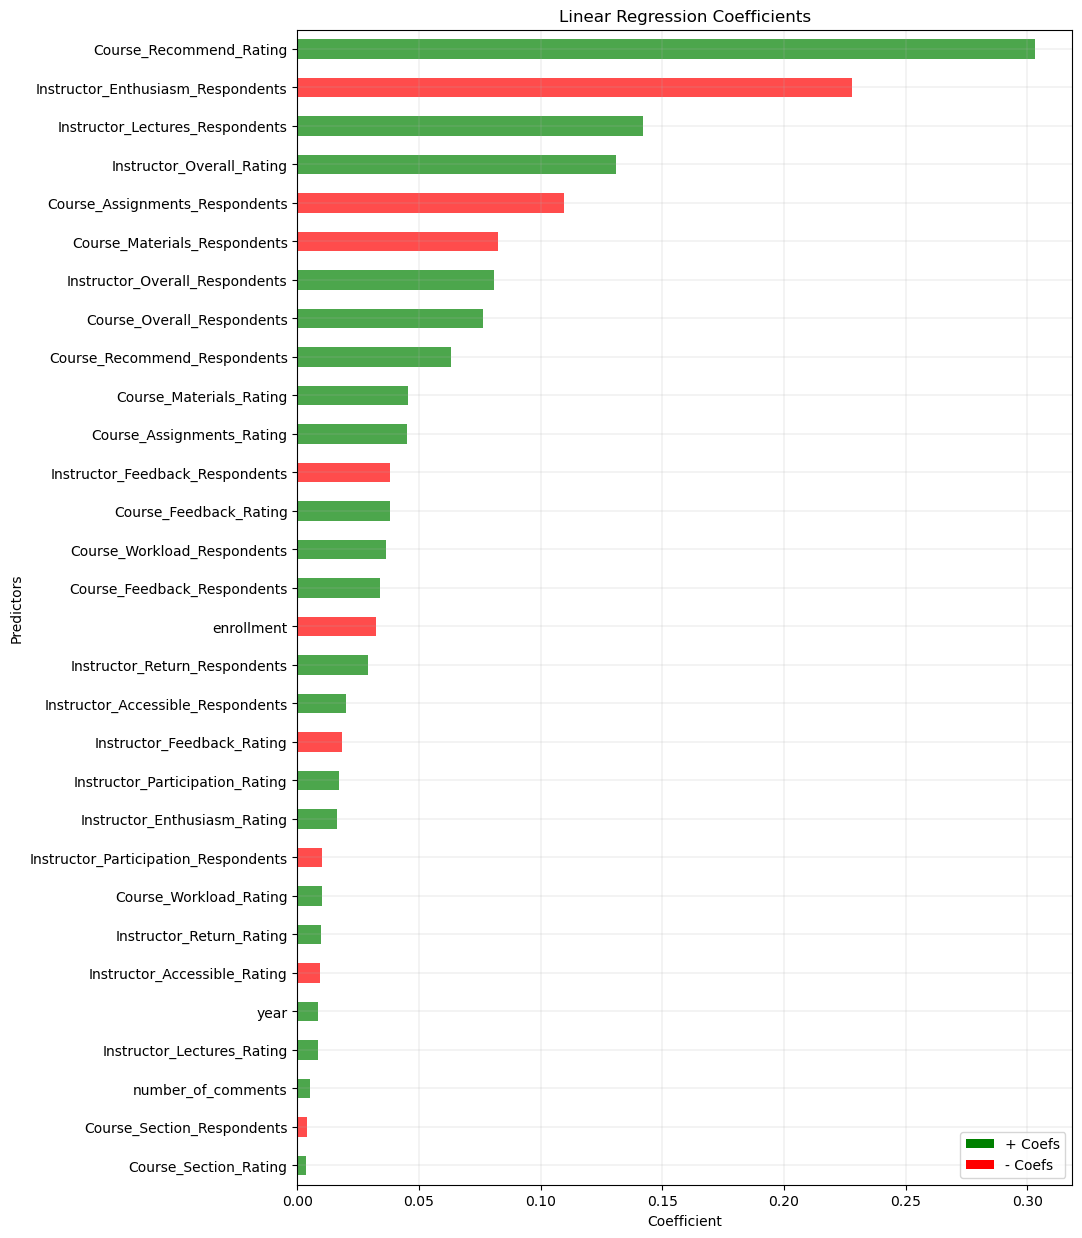

In [ ]:
linreg = LinearRegression()

linreg.fit(X_std_train, y_train)
add_result('Linear Regression (no categoricals)',
           y_train, y_test,
           linreg.predict(X_std_train),
           linreg.predict(X_std_test))

coefs = pd.DataFrame(zip(X_train_lr.columns, linreg.coef_), columns=['feature', 'coef'])
coefs['abs'] = coefs['coef'].abs()
coefs['neg'] = np.where(coefs['coef'] < 0, True, False)
coefs = coefs.sort_values(by='abs')
colors = ['red' if is_neg else 'green' for is_neg in coefs['neg']]

fig, ax = plt.subplots(figsize=(10,15))
coefs.plot.barh(x='feature', y='abs', align='center', color=colors, alpha=0.7, ax=ax)
legend_elements = [Patch(facecolor='green', label='+ Coefs'), Patch(facecolor='red', label='- Coefs')]
ax.legend(handles=legend_elements)
ax.grid(linewidth=0.2)
ax.set_xlabel('Coefficient')
ax.set_ylabel('Predictors')
ax.set_title('Linear Regression Coefficients')
plt.show()

In [ ]:
linreg = LinearRegression(fit_intercept=False)

linreg.fit(X_train_lr_cat, y_train_lr_cat)
add_result('Linear Regression (with categoricals)',
           y_train_lr_cat, y_test_lr_cat,
           linreg.predict(X_train_lr_cat),
           linreg.predict(X_test_lr_cat))

**kNN Comparison Model**

*Scale the dataset including categoricals (more important in distance-based model)*

In [ ]:
X_train_lr_cat[X_train_lr.columns] = X_std_train
X_test_lr_cat[X_train_lr.columns] = X_std_test
X_std_train_cat = X_train_lr_cat
X_std_test_cat = X_test_lr_cat

*Find best $k$ values*

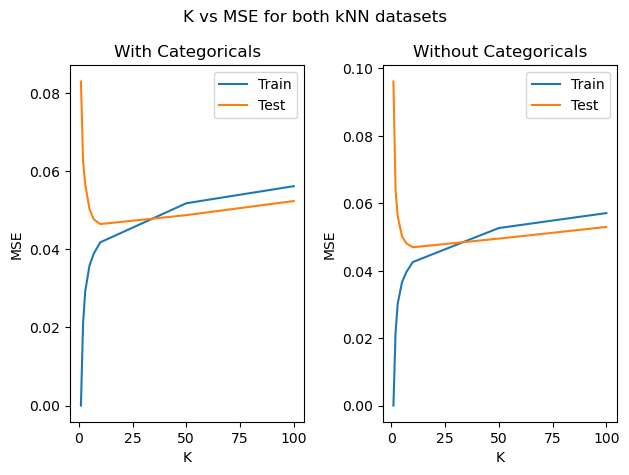

In [ ]:
k_values = [1, 2, 3, 5, 7, 10, 50, 100]
train_mse_vals = [[], []]
test_mse_vals = [[], []]

fig, axs = plt.subplots(1, 2)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_std_train, y_train)
    knn_cat = KNeighborsRegressor(n_neighbors=k).fit(X_std_train_cat, y_train_cat)
    train_mse_vals[0].append(mean_squared_error(y_train, knn.predict(X_std_train)))
    train_mse_vals[1].append(mean_squared_error(y_train_cat, knn_cat.predict(X_std_train_cat)))
    test_mse_vals[0].append(mean_squared_error(y_test, knn.predict(X_std_test)))
    test_mse_vals[1].append(mean_squared_error(y_test_cat, knn_cat.predict(X_std_test_cat)))

for i, ax in enumerate(axs.ravel()):
    title = 'With{} Categoricals'.format('out' if i == 1 else '')
    axs[i].plot(k_values, train_mse_vals[i], label='Train')
    axs[i].plot(k_values, test_mse_vals[i], label='Test')
    axs[i].set_xlabel('K')
    axs[i].set_ylabel('MSE')
    axs[i].set_title(title)
    axs[i].legend()
plt.suptitle('K vs MSE for both kNN datasets')
plt.tight_layout()

Here, it is worth noting that the training performance of the model becomes worse than the test performance as $k$ increases. One potential cause of this is the high-dimensionality of the dataset and an unfortunate random sampling of testing and training data.

*Fit models with those best $k$ values*

In [ ]:
best_k = k_values[np.argmin(test_mse_vals[0])]
best_k_cat = k_values[np.argmin(test_mse_vals[1])]

best_knn = KNeighborsRegressor(n_neighbors=best_k).fit(X_std_train, y_train)
add_result('kNN (no categoricals) k={}'.format(best_k),
           y_train, y_test,
           best_knn.predict(X_std_train),
           best_knn.predict(X_std_test))

best_knn_cat = KNeighborsRegressor(n_neighbors=best_k).fit(X_std_train_cat, y_train_cat)
add_result('kNN (with categoricals) k={}'.format(best_k_cat),
           y_train_cat, y_test_cat,
           best_knn_cat.predict(X_std_train_cat),
           best_knn_cat.predict(X_std_test_cat))

**XGBoost Comparison Model**

*Create boosting model and run it on both datasets*

In [ ]:
booster = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=1000,
                         max_depth=3,
                         learning_rate=0.1,
                         random_state=109)

In [ ]:
booster.fit(X_std_train, y_train)
add_result('XGBoost (no categoricals)',
           y_train, y_test,
           booster.predict(X_std_train),
           booster.predict(X_std_test))

booster.fit(X_std_train_cat, y_train_cat)
add_result('XGBoost (with categoricals)',
           y_train_cat, y_test_cat,
           booster.predict(X_std_train_cat),
           booster.predict(X_std_test_cat))

**Display results**

In [ ]:
pd.DataFrame(results)

,model,train_mse,test_mse,test_r2
0,Linear Regression (no categoricals),0.040451,0.034080,0.891050
1,Linear Regression (with categoricals),0.039000,0.033913,0.891584
2,kNN (no categoricals) k=10,0.041793,0.046470,0.851441
3,kNN (with categoricals) k=10,0.042559,0.046954,0.849894
4,XGBoost (no categoricals),0.019675,0.032690,0.895494
5,XGBoost (with categoricals),0.020745,0.032250,0.896900


**Interpretation of Results**

From our results, we see that it is likely that gradient boosting in the form of Extreme Gradient Boosting given by the XGBoost library will give us the most predictive power. Linear regression serves as a solid baseline model, while k-neigbhors did not perform as well as the other regression models. We believe we can tune the model by trying different values for parameters such as `n_estimators` and `learning_rate`.\
We would also like to try other methods of data preprocessing to feed into the model and compare those results. In this basic round, we filtered out entries with missing data and used categorical variables already provided by the dataset. To potentially improve the model, we could try various imputation methods on the missing data. Further, we could include more categorical variables that are inherent to the data although not explicitly laid out as a predictor already (e.g. does the coure have a second course number?).

**Baseline vs Comparison**

From our testing, it seems that linear regression is a solid baseline model and extreme gradient boosting is a solid comparison model to see how much we can improve on linear regression. It makes sense that gradient boosting would be somewhat better-suited for the proposed problem, as many of the relationships we viewed between predictor and response in the EDA portion were non-linear. Furthermore, the linear regression model would have to be fed in interaction terms, whereas gradient boosting naturally incorporates interaction as an ensemble model as the combination of multiple splits across multiple features.

**Final Model Pipleline**
***(Flow Chart of Pipeline Below)*** 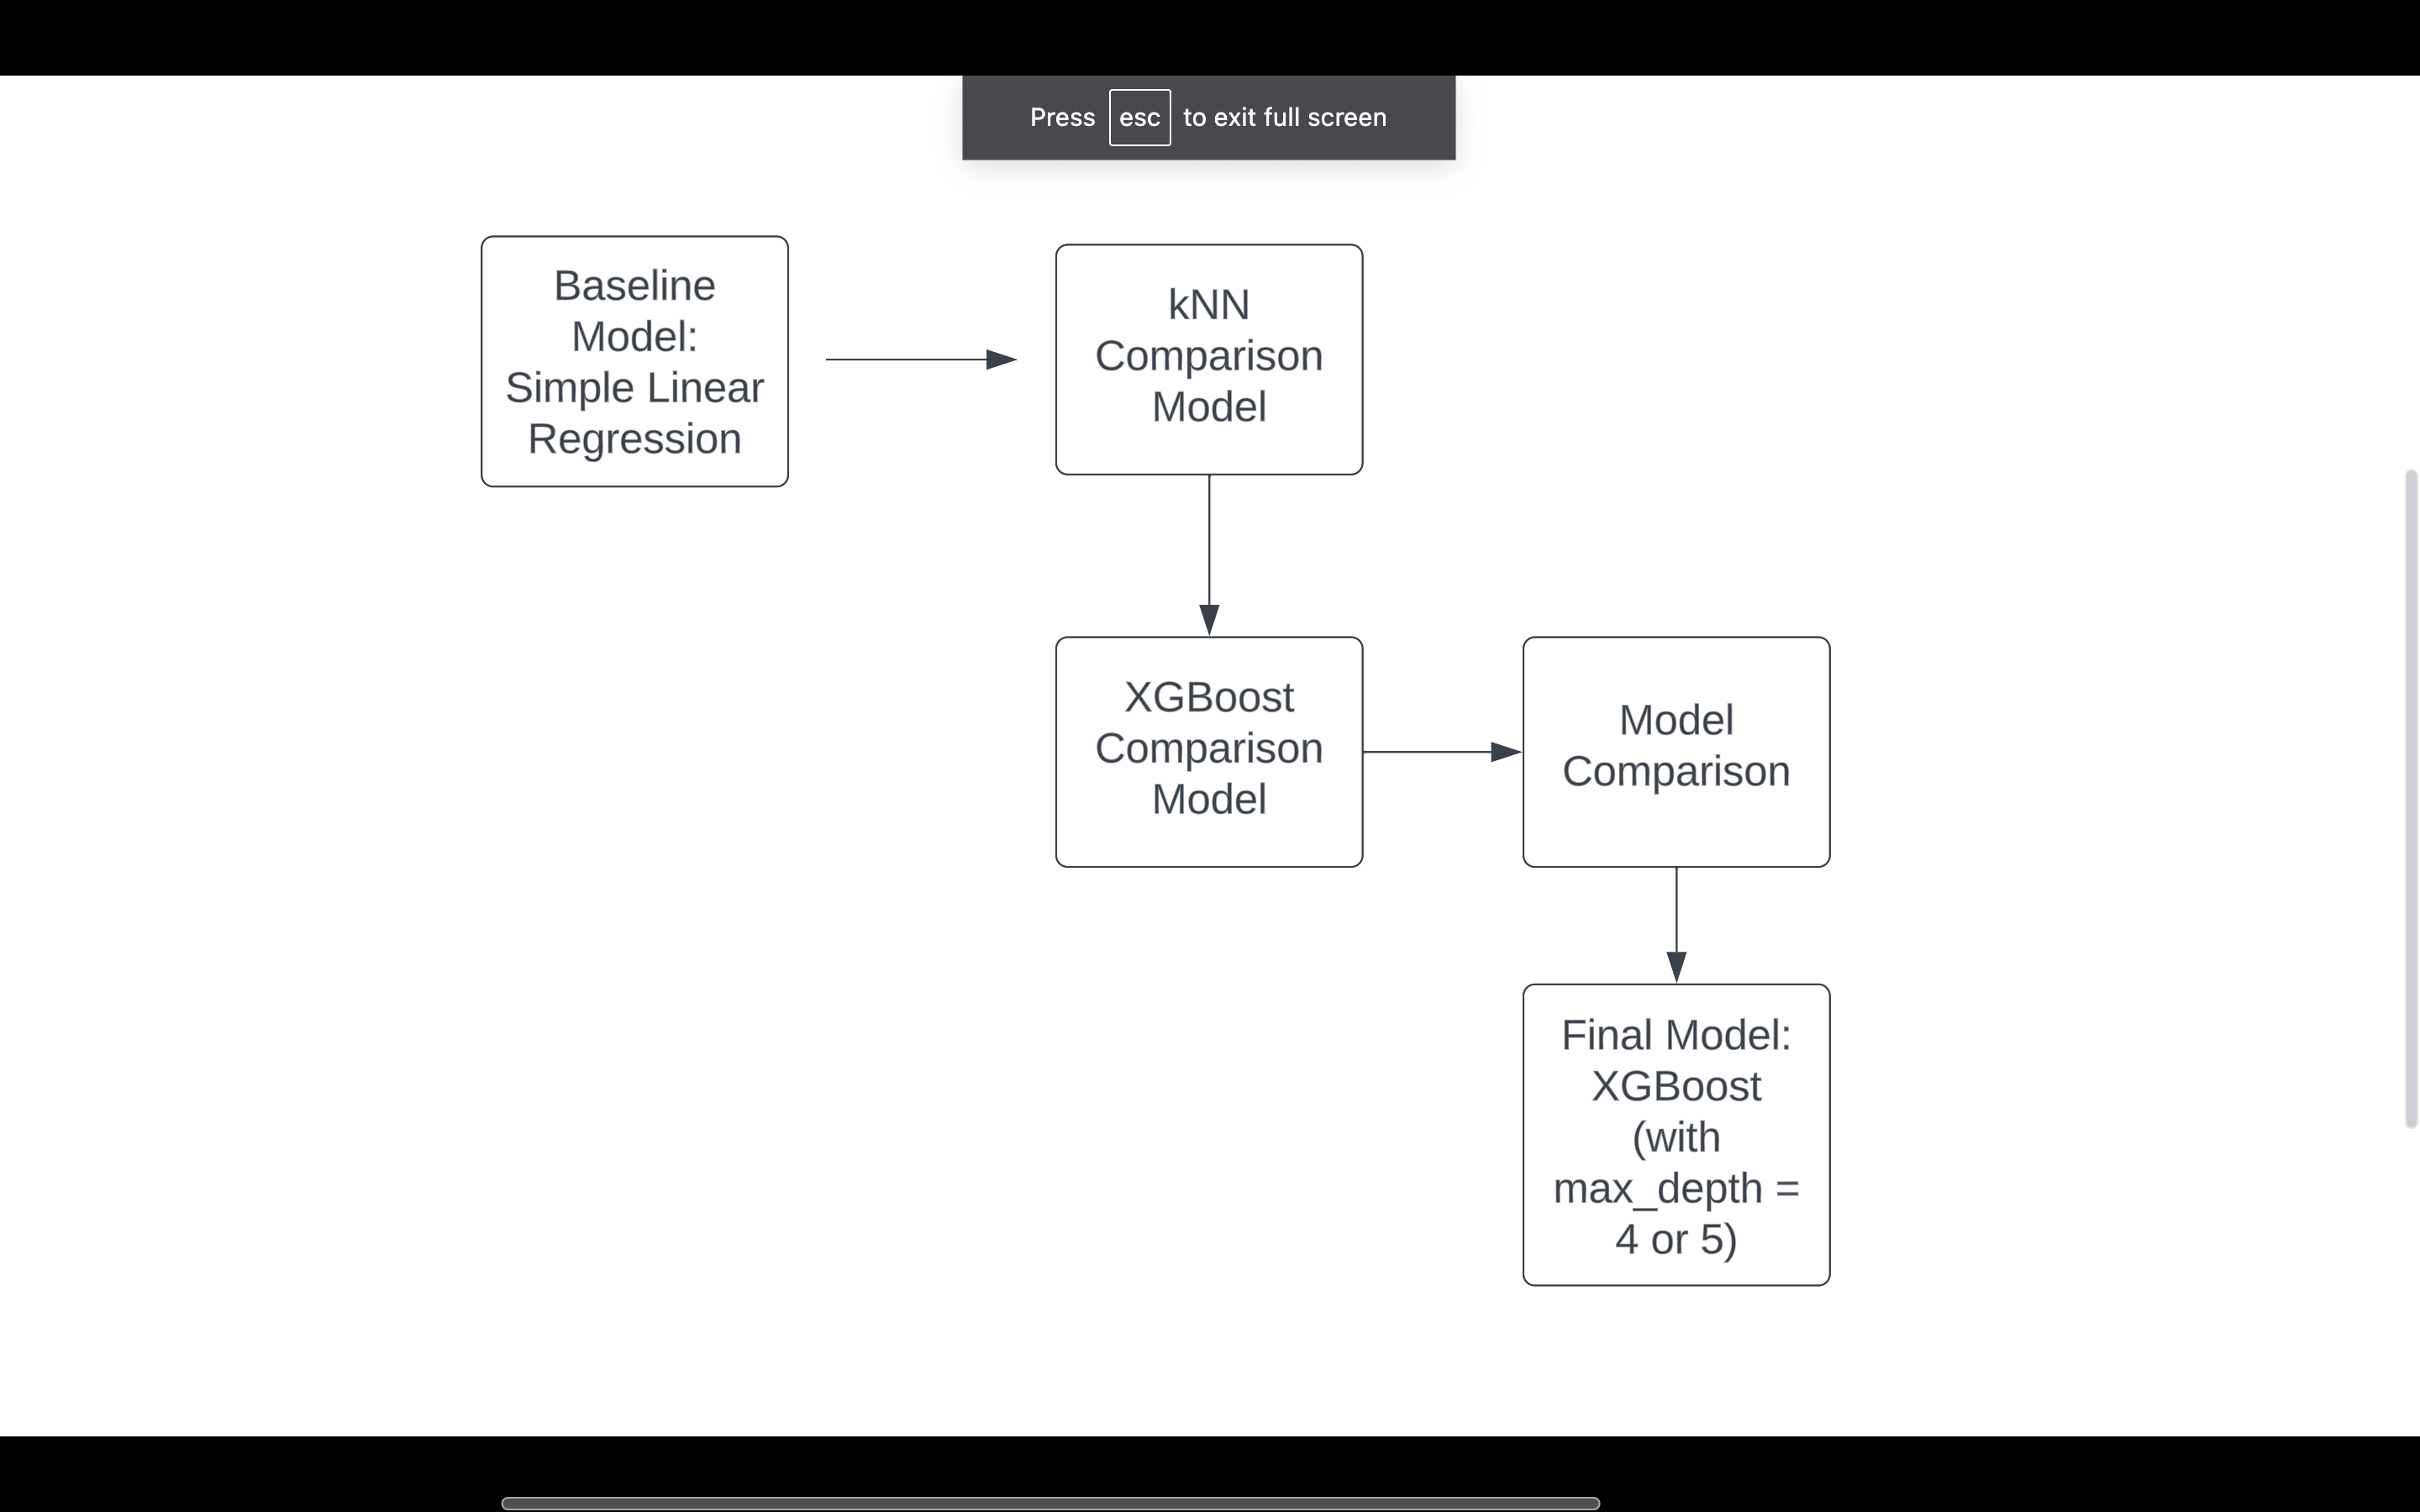

**Testing both models on variations of the data**

In [ ]:
new_results = []
def add_result(name, y_train, y_hat_train, y_test, y_hat_test, time, learning_rate):
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    test_r2 = r2_score(y_test, y_hat_test)
    new_results.append({'model': name, 'time': time, 'l_rate':learning_rate,
                        'train_mse': train_mse, 'test_mse': test_mse, 'test_r2': test_r2})

def run_linreg(name, has_categoricals, X_train, y_train, X_test, y_test):
    start = time.time()
    linreg = LinearRegression(fit_intercept=not has_categoricals)
    linreg.fit(X_train, y_train)
    train_pred = linreg.predict(X_train)
    test_pred = linreg.predict(X_test)
    time_total = time.time()-start
    add_result('Linreg ' + name, y_train, train_pred, y_test, test_pred, time_total, None)

def run_xgboost(name, hyperparams, X_train, y_train, X_test, y_test):
    start = time.time()
    booster = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=hyperparams[0],
                         max_depth=hyperparams[1],
                         learning_rate=hyperparams[2],
                         random_state=109)
    booster.fit(X_train, y_train)
    train_pred = booster.predict(X_train)
    test_pred = booster.predict(X_test)
    time_total = time.time()-start
    add_result('XGBoost({}, {}, {}) '.format(hyperparams[0], hyperparams[1], hyperparams[2]) + name,
           y_train, train_pred, y_test, test_pred, time_total, hyperparams[2])


def run_models():
    X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df_linreg_with_cats.drop(columns=['Course_Overall_Rating']), df_linreg_with_cats['Course_Overall_Rating'], test_size=0.25, random_state=109)
    X_train, X_test, y_train, y_test = train_test_split(df_linreg.drop(columns=['Course_Overall_Rating']), df_linreg['Course_Overall_Rating'], test_size=0.25, random_state=109)

    datasets = [{'name':'numeric only', 'X_train':X_train, 'X_test':X_test, 'y_train':y_train, 'y_test':y_test, 'cats':False},
                {'name':'with cats', 'X_train':X_train_cat, 'X_test':X_test_cat, 'y_train':y_train_cat, 'y_test':y_test_cat, 'cats':True}]

    for dataset in datasets:
        X_train = dataset['X_train']
        X_test = dataset['X_test']
        y_train = dataset['y_train']
        y_test = dataset['y_test']
        has_cats = dataset['cats']
        name = dataset['name']

        run_linreg(name, has_cats, X_train, y_train, X_test, y_test)

        estimators=[100, 500, 1000, 5000]
        max_depths = range(1, 6)
        learning_rates = [0.025, 0.05, 0.1, 0.3, 0.5]
        hyperparameters = itertools.product(estimators, max_depths, learning_rates)

        for hyperparameter_set in hyperparameters:
            run_xgboost(name, hyperparameter_set, X_train, y_train, X_test, y_test)

In [ ]:
run_models()

In [ ]:
results_df = pd.DataFrame(new_results)
results_df.head()

,model,time,l_rate,train_mse,test_mse,test_r2
0,Linreg numeric only,0.015423,NaN,0.040451,0.034080,0.891050
1,"XGBoost(100, 1, 0.025) numeric only",0.197019,0.025,0.071757,0.066404,0.787715
2,"XGBoost(100, 1, 0.05) numeric only",0.064166,0.050,0.045102,0.042124,0.865335
3,"XGBoost(100, 1, 0.1) numeric only",0.061513,0.100,0.034889,0.035103,0.887781
4,"XGBoost(100, 1, 0.3) numeric only",0.078263,0.300,0.034198,0.036359,0.883764


*View the overall best models*

In [ ]:
results_df.sort_values(by='test_mse').head()

,model,time,l_rate,train_mse,test_mse,test_r2
148,"XGBoost(500, 5, 0.05) with cats",1.604746,0.050,0.020268,0.031766,0.898448
172,"XGBoost(1000, 5, 0.025) with cats",3.647142,0.025,0.020560,0.031831,0.898240
143,"XGBoost(500, 4, 0.05) with cats",1.923342,0.050,0.023676,0.031853,0.898170
147,"XGBoost(500, 5, 0.025) with cats",1.709332,0.025,0.022797,0.031865,0.898133
167,"XGBoost(1000, 4, 0.025) with cats",3.057554,0.025,0.023759,0.031891,0.898050


Here, we see that the best performing models were all XGBoost models on the dataset that included categoricals. Further, the `max_depth` was 4 or 5 for the top models, indicating that deeper base learners performed the best. We also see a small learning rate combined with an intermediate `n_estimators`. This makes sense because we are not underfitting or overfitting.

*Display results for each dataset*

In [ ]:
def plot_results(results, title):
    xgb_results = results[results['model'].str.contains('XGBoost', regex=False)]
    linreg_results = results[results['model'].str.contains('Linreg', regex=False)]
    linreg_mse, linreg_r2 = linreg_results['test_mse'].values[0], linreg_results['test_r2'].values[0]
    avg_xgb_mse, avg_xgb_r2 = xgb_results['test_mse'].mean(), xgb_results['test_r2'].mean()
    best_xgb = xgb_results[xgb_results['test_mse'] == xgb_results['test_mse'].min()]
    best_xgb_mse, best_xgb_r2 = best_xgb['test_mse'].values[0], best_xgb['test_r2'].values[0]
    mses = {'from':['linreg', 'avg_boost', 'best_boost'], 'mse':[linreg_mse, avg_xgb_mse, best_xgb_mse]}
    mse_df = pd.DataFrame.from_dict(mses)
    r2s = {'from':['linreg', 'avg_boost', 'best_boost'], 'r2':[linreg_r2, avg_xgb_r2, best_xgb_r2]}
    r2_df = pd.DataFrame.from_dict(r2s)

    p, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.ravel()

    sns.barplot(data=mse_df, x='from', y='mse', ax=axs[0], color='skyblue')
    axs[0].set_title('Test MSE of Models')
    sns.barplot(data=r2_df, x='from', y='r2', ax=axs[1], color='skyblue')
    axs[1].set_title('R2 Scores of Models')
    sns.scatterplot(data=results, x='time', y='test_mse', ax=axs[2])
    axs[2].set_title('Time to Run vs MSE')
    sns.scatterplot(data=xgb_results, x='l_rate', y='time', ax=axs[3])
    axs[3].set_title('XGBoost Learning Rate vs Time')

    p.tight_layout(rect=[0, 0.03, 1, 0.95])
    p.suptitle(title)

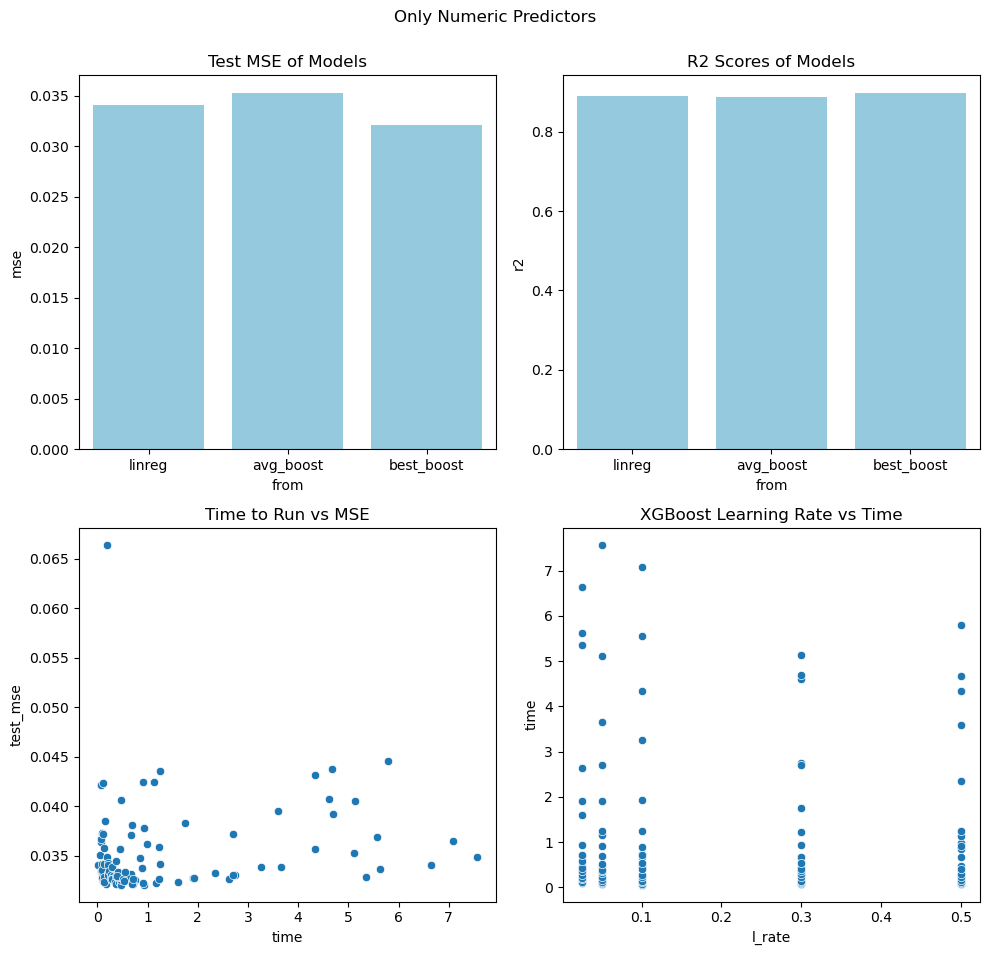

In [ ]:
results_num_only = results_df[results_df['model'].str.contains('numeric only', regex=False)]
plot_results(results_num_only, 'Only Numeric Predictors')

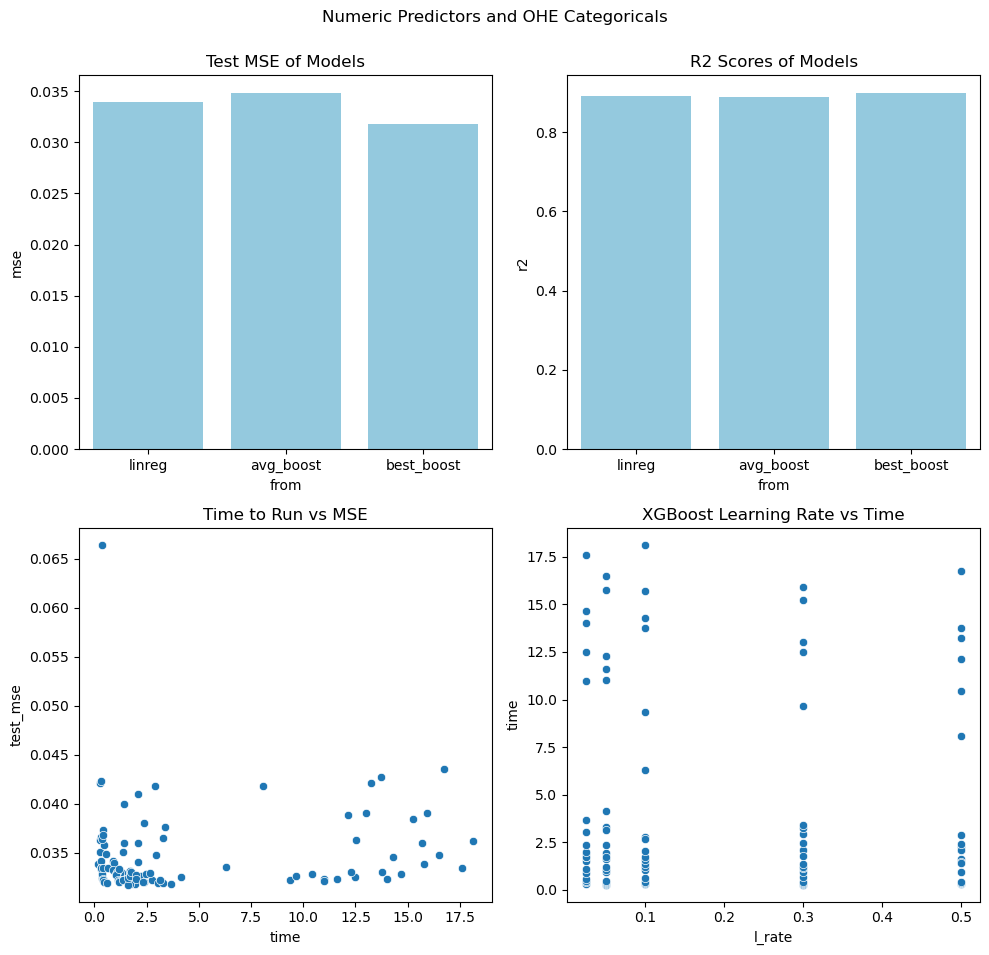

In [ ]:
results_with_cats = results_df[results_df['model'].str.contains('with cats', regex=False)]
plot_results(results_with_cats, 'Numeric Predictors and OHE Categoricals')

***Analysis:***
_First, we see that the graphs that involve only numerical predictors and their respective graphs that involve numeric predictors and OHE Categoricals look very similar to one another. This implies that the One Hot Encoders do not make a major difference in our model results, so we can leave them out of our model._

_The bar graphs reveal that all three models have similar R2 scores, but that our best_boost model has the lowest test MSE and therefore is the best at generalizing to new data. We also see in the bottom left plot that a more computationally expensive (in terms of time) model is not necessarily the best-performing model. Finally, we see in the bottom right plot that learning rate doesn't impact the time for XGBoost to run as much as `n_estimators`._

**Conclusion and Future Work**


***Conclusion***

_In conclusion, we were successfully able to improve our model from the baseline model of linear regression to the more generalizable model of XGBoost. Our final model could predict the Mean Overall Score of courses more effectively; achieved a relatively low test MSE of around 0.318, and a relatively high test R2 score of around 0.898._

_XGBoost is less interpretable than linear regression, so in implementing our final model we shifted our priorities more towards achieving accurate predictions and away from determining the strongest predictors of our response variable. However, we still succeeded to find some of the strongest predictors earlier on in our project, as seen in our "Linear Regression Coefficients Plot"._

***Future Work***

_There are several possibilities for future projects that would build off of our own. One possibility would be to do a similar project that collected and kept track of course ratings from individual students as data instead of class averages. Another possibility would be to run a study with more rigorous methods of quantifying various course factors, rather than generic ratings on a 1 to 5 scale. Both of these experiments could reveal more about why students like certain courses more than others._

_In addition, future project could extend our project by adding in methods of causal inference. For instance, a randomization test would help explain whether any of our predictors are causally linked with higher course ratings, rather than simply correlated. Theoretically, A/B testing could also be done, but it would be very expensive, requiring professors to design courses specifically tailored to the study (e.g. two sections of the same course, but one assigns more homework than the other). The question of what causes a course to be popular is also fascinating enough to merit its own projects._